# Automated Machine Learning - Dataset 2: IoTID20

# Importing Libraries

In [ ]:
import joblib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import lightgbm as lgb
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE
import time
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Dataset 2: IoTID20

A subset of the IoT network traffic data randomly sampled from the IoTID20 dataset. 

IoTID20 dataset was created by using normal and attack virtual machines as network platforms, simulating IoT services with the node-red tool, and extracting features with the Information Security Center of Excellence (ISCX) flow meter program. A typical smart home environment was established for generating this dataset using five IoT devices or services: a smart fridge, a smart thermostat, motion-activated lights, a weather station, and a remotely-activated garage door. Thus, the traffic data samples of normal and abnormal IoT devices are collected in Pcap files.


In [ ]:
df = pd.read_csv("IoT_2020_b_0.01.csv")
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,Flow_Duration,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Bwd_Pkt_Len_Max,...,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Std,FIN_Flag_Cnt,Pkt_Size_Avg,Init_Bwd_Win_Byts,Idle_Mean,Idle_Max,Idle_Min,Label
0,0.198248,0.446464,0.821049,0.413136,0.148302,0.874767,0.001241,0.000000,0.123680,0.950685,...,0.000000,0.016109,0.000000,0.0,0.950685,0.028534,0.002506,0.001310,0.002976,1
1,0.000765,0.446413,0.931680,0.222458,0.127585,0.848929,0.466032,0.066289,0.000000,0.000000,...,0.000019,0.000023,0.829215,0.0,0.288584,0.001938,0.311194,0.424812,0.045834,1
2,0.198045,0.446413,0.139234,0.419492,0.867104,0.525838,0.000726,0.036396,0.061840,0.950685,...,0.005993,0.013679,0.000000,0.0,0.950685,0.028534,0.001475,0.000771,0.001752,1
3,0.197967,0.446464,0.813747,0.413136,0.148302,0.456471,0.001493,0.000000,0.000000,0.000000,...,0.005872,0.006691,0.000000,0.0,0.000000,0.498657,0.001506,0.000792,0.001776,1
4,0.197967,0.446464,0.813747,0.413136,0.148302,0.442970,0.000827,0.000000,0.000000,0.000000,...,0.005271,0.012028,0.000000,0.0,0.000000,0.494736,0.001678,0.000877,0.001992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,0.197483,0.446464,0.156291,0.413136,0.148302,0.245577,0.000696,0.000000,0.123680,0.950685,...,0.000000,0.028552,0.000000,0.0,0.950685,0.028534,0.001415,0.000739,0.001680,1
6248,0.213862,0.446413,0.928608,0.483051,0.146312,0.759311,0.000394,0.003356,0.001426,0.021918,...,0.043750,0.024980,0.000000,0.0,0.017534,0.000000,0.000202,0.000222,0.000120,1
6249,0.119352,0.269300,0.131007,0.413136,0.009109,0.860102,0.012935,0.000000,0.000000,0.000000,...,0.000000,0.001539,0.000000,0.0,0.000000,0.222794,0.025932,0.013550,0.030788,1
6250,0.978750,0.446516,1.000000,0.483051,0.164217,0.742551,0.002230,0.002517,0.001426,0.021918,...,0.005912,0.004484,0.000000,0.0,0.018265,0.000000,0.001496,0.002176,0.000192,1


# Data Visualization

In [ ]:
df.shape

(6252, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            6252 non-null   int64  
 1   Src_IP             6252 non-null   int64  
 2   Src_Port           6252 non-null   int64  
 3   Dst_IP             6252 non-null   int64  
 4   Dst_Port           6252 non-null   int64  
 5   Timestamp          6252 non-null   int64  
 6   Flow_Duration      6252 non-null   int64  
 7   TotLen_Fwd_Pkts    6252 non-null   float64
 8   TotLen_Bwd_Pkts    6252 non-null   float64
 9   Bwd_Pkt_Len_Max    6252 non-null   float64
 10  Flow_Byts/s        6252 non-null   float64
 11  Flow_Pkts/s        6252 non-null   float64
 12  Flow_IAT_Mean      6252 non-null   float64
 13  Flow_IAT_Std       6252 non-null   float64
 14  Flow_IAT_Max       6252 non-null   float64
 15  Flow_IAT_Min       6252 non-null   float64
 16  Fwd_IAT_Tot        6252 

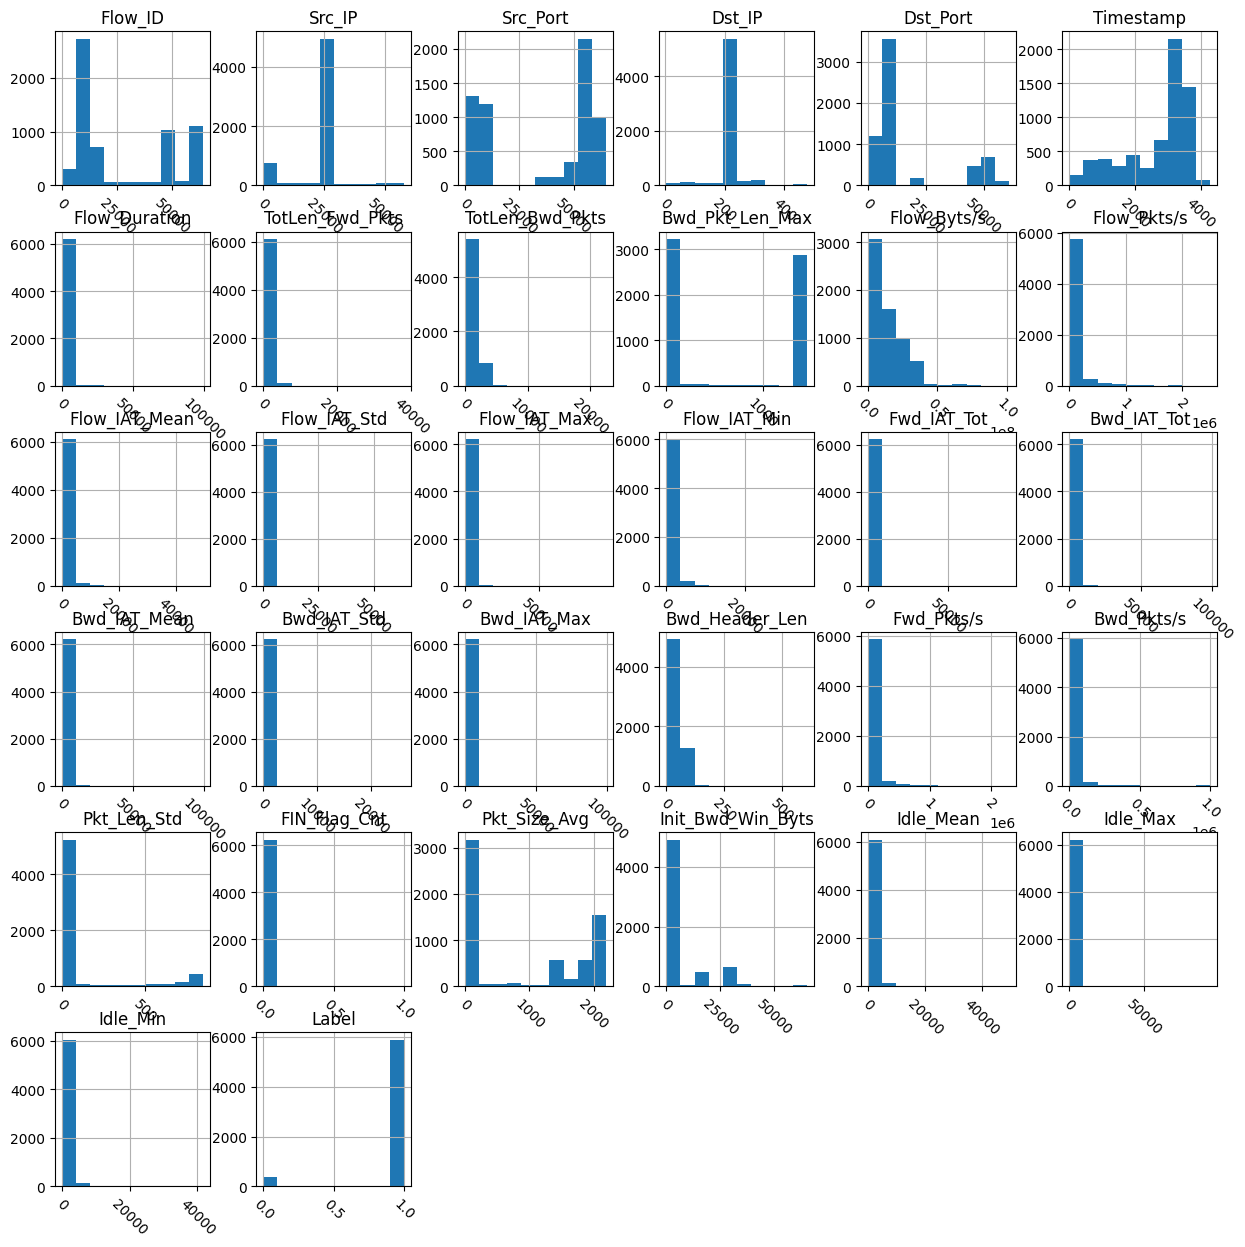

In [ ]:
from matplotlib import pyplot as plt
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<AxesSubplot: >

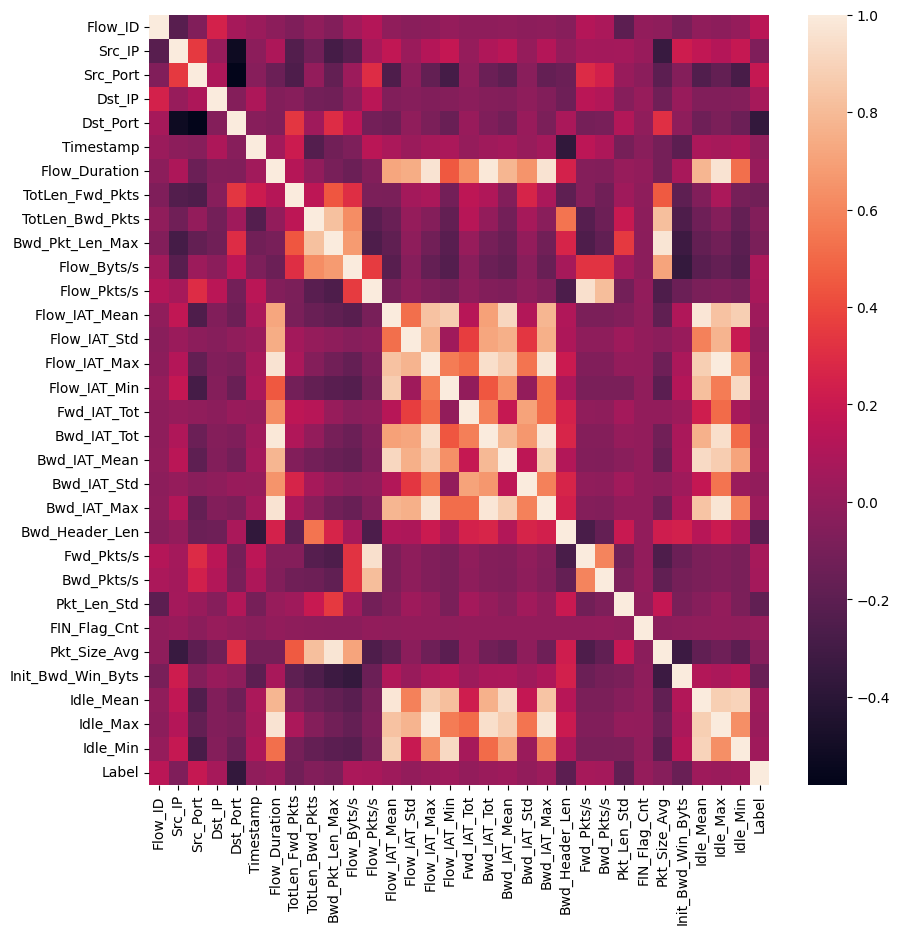

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

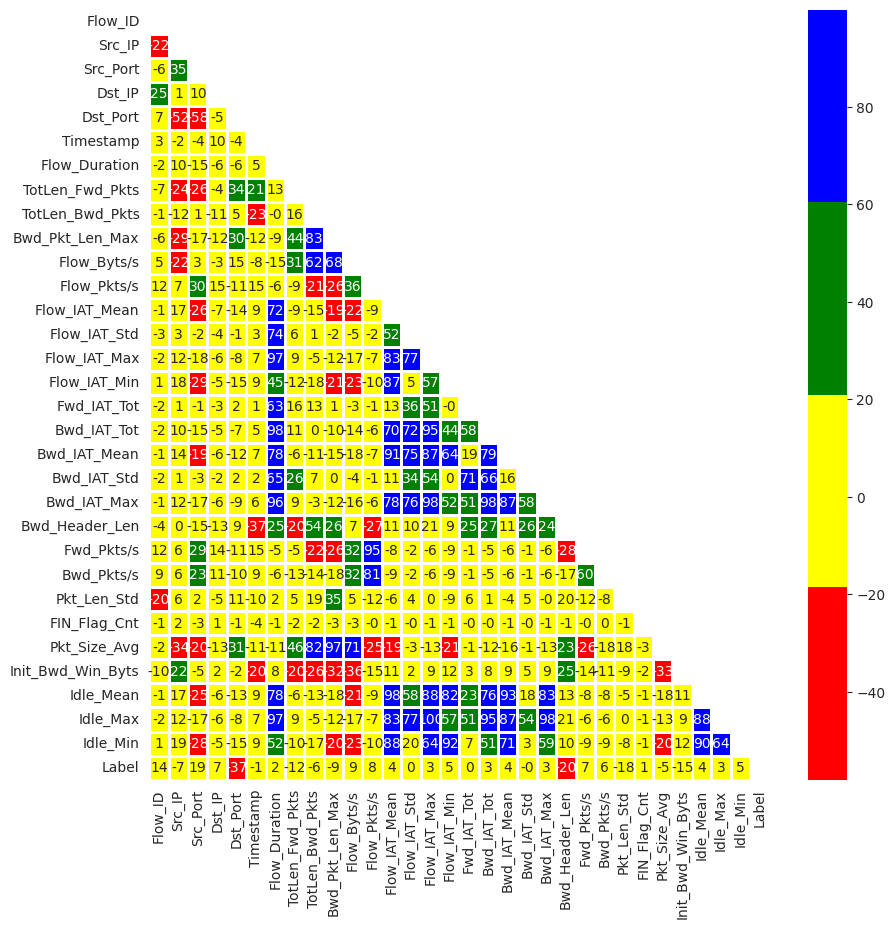

In [ ]:
from matplotlib.colors import ListedColormap

mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # Upper triangle mask
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['red', 'yellow', 'green', 'blue']))
plt.show()


# Data Pre-Processing

### Encoding

In [ ]:
# Define the automated data encoding function
def Auto_Encoding(df):
    cat_features=[x for x in df.columns if df[x].dtype=="object"] ## Find string/text features
    le=LabelEncoder()
    for col in cat_features:
        if col in df.columns:
            i = df.columns.get_loc(col)
            # Transform to numerical features
            df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
    return df

df=Auto_Encoding(df)

### Imputation

In [ ]:
# Define the automated data imputation function
def Auto_Imputation(df):
    if df.isnull().values.any() or np.isinf(df).values.any(): # if there is any empty or infinite values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace = True)  # Replace empty values with zeros; there are other imputation methods discussed in the paper
    return df

df=Auto_Imputation(df)

### Normalization

In [ ]:
def Auto_Normalization(df):
    stat, p = shapiro(df)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    numeric_features = df.drop(['Label'],axis = 1).dtypes[df.dtypes != 'object'].index

    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        df[numeric_features] = df[numeric_features].apply(
            lambda x: (x - x.mean()) / (x.std()))
        print('Z-score normalization is automatically chosen and used')
    else:
        print('Sample does not look Gaussian (reject H0)')
        df[numeric_features] = df[numeric_features].apply(
            lambda x: (x - x.min()) / (x.max()-x.min()))
        print('Min-max normalization is automatically chosen and used')
    return df

df=Auto_Normalization(df)

Statistics=0.108, p=0.000
Sample does not look Gaussian (reject H0)
Min-max normalization is automatically chosen and used


### Train-test split

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']

# Here we used the 80%/20% split, it can be changed based on specific tasks
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, shuffle=False,random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2,random_state = 0)

### Data balancing

In [ ]:
pd.Series(y_train).value_counts()

Label
1    4717
0     284
Name: count, dtype: int64

In [ ]:
"""
# For binary data (can be modified for multi-class data with the same logic)
def Auto_Balancing(X_train, y_train):
    number0 = pd.Series(y_train).value_counts().iloc[0]
    number1 = pd.Series(y_train).value_counts().iloc[1]
    
    if number0 > number1:
        nlarge = number0
    else:
        nlarge = number1
    
    # evaluate whether the incoming dataset is imbalanced (the abnormal/normal ratio is smaller than a threshold (e.g., 50%)) 
    if (number1/number0 > 1.5) or (number0/number1 > 1.5):
        smote=SMOTE(n_jobs=-1,sampling_strategy={0:nlarge, 1:nlarge})
        X_train, y_train = smote.fit_resample(X_train, y_train)
        
    return X_train, y_train

X_train, y_train = Auto_Balancing(X_train, y_train)
"""

'\n# For binary data (can be modified for multi-class data with the same logic)\ndef Auto_Balancing(X_train, y_train):\n    number0 = pd.Series(y_train).value_counts().iloc[0]\n    number1 = pd.Series(y_train).value_counts().iloc[1]\n    \n    if number0 > number1:\n        nlarge = number0\n    else:\n        nlarge = number1\n    \n    # evaluate whether the incoming dataset is imbalanced (the abnormal/normal ratio is smaller than a threshold (e.g., 50%)) \n    if (number1/number0 > 1.5) or (number0/number1 > 1.5):\n        smote=SMOTE(n_jobs=-1,sampling_strategy={0:nlarge, 1:nlarge})\n        X_train, y_train = smote.fit_resample(X_train, y_train)\n        \n    return X_train, y_train\n\nX_train, y_train = Auto_Balancing(X_train, y_train)\n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            6252 non-null   float64
 1   Src_IP             6252 non-null   float64
 2   Src_Port           6252 non-null   float64
 3   Dst_IP             6252 non-null   float64
 4   Dst_Port           6252 non-null   float64
 5   Timestamp          6252 non-null   float64
 6   Flow_Duration      6252 non-null   float64
 7   TotLen_Fwd_Pkts    6252 non-null   float64
 8   TotLen_Bwd_Pkts    6252 non-null   float64
 9   Bwd_Pkt_Len_Max    6252 non-null   float64
 10  Flow_Byts/s        6252 non-null   float64
 11  Flow_Pkts/s        6252 non-null   float64
 12  Flow_IAT_Mean      6252 non-null   float64
 13  Flow_IAT_Std       6252 non-null   float64
 14  Flow_IAT_Max       6252 non-null   float64
 15  Flow_IAT_Min       6252 non-null   float64
 16  Fwd_IAT_Tot        6252 

# ML Model Learning

### LGBM Classifier Algorithm

In [ ]:
%%time
lg = lgb.LGBMClassifier(verbose = -1)
lg.fit(X_train,y_train)
t1=time.time()
predictions = lg.predict(X_test)
t2=time.time()
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*100)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*100)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")
print("Time: "+str(round((t2-t1)/len(y_test)*1000000,5)))

Accuracy: 99.83999999999999%
Precision: 99.91499999999999%
Recall: 99.91499999999999%
F1-score: 99.91499999999999%
Time: 9.49062
CPU times: user 288 ms, sys: 3.81 ms, total: 292 ms
Wall time: 357 ms


### Random Forest Algorithm

In [ ]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
t1=time.time()
predictions = rf.predict(X_test)
t2=time.time()
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*100)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*10)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")
print("Time: "+str(round((t2-t1)/len(y_test)*1000000,5)))

Accuracy: 99.68%
Precision: 99.66000000000001%
Recall: 10.0%
F1-score: 99.83%
Time: 25.23025
CPU times: user 563 ms, sys: 3.02 ms, total: 566 ms
Wall time: 704 ms


In [ ]:
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

### Naive Bayes Algorithm

In [ ]:
%%time
nb = GaussianNB()
nb.fit(X_train,y_train)
t1=time.time()
predictions = nb.predict(X_test)
t2=time.time()
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*10)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*100)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")
print("Time: "+str(round((t2-t1)/len(y_test)*1000000,5)))

Accuracy: 61.791%
Precision: 10.0%
Recall: 59.284000000000006%
F1-score: 74.439%
Time: 2.39619
CPU times: user 12.8 ms, sys: 69 µs, total: 12.8 ms
Wall time: 13.1 ms


In [ ]:
joblib.dump(nb, 'nb_model.pkl')

['nb_model.pkl']

### K-Nearest Neighbors (KNN) Algorithm

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
t1=time.time()
predictions = knn.predict(X_test)
t2=time.time()
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*100)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*100)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")
print("Time: "+str(round((t2-t1)/len(y_test)*1000000,5)))

Accuracy: 99.52%
Precision: 99.576%
Recall: 99.91499999999999%
F1-score: 99.74499999999999%
Time: 261.90462
CPU times: user 147 ms, sys: 66.9 ms, total: 214 ms
Wall time: 338 ms


In [ ]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
import tensorflow as tf
from keras.layers import Input,Dense,Dropout,BatchNormalization,Activation
from keras import Model
import keras.backend as K
import keras.callbacks as kcallbacks
from keras import optimizers
from keras.optimizers import Adam

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=16,batch_size=1024,epochs=80,activation='relu',patience=8,loss='binary_crossentropy'):
    K.clear_session()
    inputs=Input(shape=(X.shape[1],))
    x=Dense(1000)(inputs)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.3)(x)
    x=Dense(256)(inputs)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    x=Dense(2,activation='softmax')(x)
    model=Model(inputs=inputs,outputs=x,name='base_nlp')
    model.compile(optimizer='adam',loss='categorical_crossentropy')
#     model.compile(optimizer=Adam(lr = 0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, pd.get_dummies(y).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

2024-05-08 05:56:47.756720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 05:56:48.014554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-08 05:56:48.014601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-08 05:56:48.055521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 05:56:49.296070: W tensorflow/stream_executor/platform/de

### KerasClassifier Model 

In [ ]:
%%time
ann = KerasClassifier(build_fn=ANN, verbose=0)
ann.fit(X_train,y_train)
predictions = ann.predict(X_test)
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*100)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*10)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")
print("Time: "+str(round((t2-t1)/len(y_test)*1000000,5)))

2024-05-08 05:56:50.441485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-08 05:56:50.441534: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-08 05:56:50.441564: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-c049c8b0-e309-44b9-995e-459d2a2eea3b): /proc/driver/nvidia/version does not exist
2024-05-08 05:56:50.441813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
40/40 [==============================] - 0s 1ms/step
Accuracy: 98.961%
Precision: 99

In [ ]:
joblib.dump(ann, 'ann_model.pkl')

INFO:tensorflow:Assets written to: ram://c14a762a-a321-44cb-84d9-983e01a800f0/assets


['ann_model.pkl']

# Model Selection

### Method: Grid Search

In [ ]:
# Create a pipeline
pipe = Pipeline([('classifier', GaussianNB())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [GaussianNB()]},
                {'classifier': [KNeighborsClassifier()]},
                {'classifier': [RandomForestClassifier()]},
                {'classifier': [lgb.LGBMClassifier(verbose = -1)]},
                {'classifier': [KerasClassifier(build_fn=ANN, verbose=0)]},
                 ]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [ ]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', GaussianNB())]),
             param_grid=[{'classifier': [GaussianNB()]},
                         {'classifier': [KNeighborsClassifier()]},
                         {'classifier': [RandomForestClassifier()]},
                         {'classifier': [LGBMClassifier(verbose=-1)]},
                         {'classifier': [<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdba352f400>]}])

In [ ]:
print("Best Model:"+ str(clf.best_params_))
print("Accuracy:"+ str(clf.best_score_))

Best Model:{'classifier': LGBMClassifier(verbose=-1)}
Accuracy:0.9993601278976818


# 5. Combined Algorithm Selection and Hyperparameter tuning (CASH)

CASH is the process of combining the two AutoML procedures: model selection and hyperparameter optimization.

## Method: Particle Swarm Optimization (PSO)

In [ ]:
import optunity
import optunity.metrics

search = {'algorithm': {'k-nn': {'n_neighbors': [3, 10]},
                        'naive-bayes': None,
                        'random-forest': {
                                'n_estimators': [20, 100],
                                'max_features': [5, 12],
                                'max_depth': [5,50],
                                "min_samples_split":[2,11],
                                "min_samples_leaf":[1,11]},
                        'lightgbm': {
                                'n_estimators': [20, 100],
                                'max_depth': [5, 50],
                                'learning_rate': (0, 1),
                                "num_leaves":[100, 2000],
                                "min_child_samples":[10, 50],
                                    },
                        'ann': {
                                'neurons': [10, 100],
                                'epochs': [20, 50],
                                'patience': [3, 20],
                                }
                        }
          
         }
def performance(
                algorithm, n_neighbors=None, 
    n_estimators=None, max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,
    learning_rate=None,num_leaves=None,min_child_samples=None,
    neurons=None,epochs=None,patience=None
):
    # fit the model
    if algorithm == 'k-nn':
        model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    elif algorithm == 'naive-bayes':
        model = GaussianNB()
    elif algorithm == 'random-forest':
        model = RandomForestClassifier(n_estimators=int(n_estimators),
                                       max_features=int(max_features),
                                       max_depth=int(max_depth),
                                       min_samples_split=int(min_samples_split),
                                       min_samples_leaf=int(min_samples_leaf))
    elif algorithm == 'lightgbm':
        model = lgb.LGBMClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   learning_rate=float(learning_rate),
                                   num_leaves=int(num_leaves),
                                   min_child_samples=int(min_child_samples),
                                  )
    elif algorithm == 'ann':
        model = KerasClassifier(build_fn=ANN, verbose=0,
                               neurons=int(neurons),
                                epochs=int(epochs),
                                patience=int(patience)
                               )
    else:
        raise ArgumentError('Unknown algorithm: %s' % algorithm)
# predict the test set
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return score

# Run the CASH process
optimal_configuration, info, _ = optunity.maximize_structured(performance, 
                                                              search_space=search, 
                                                              num_evals=50)
print(optimal_configuration)
print(info.optimum)

40/40 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 4717, number of negative: 284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6338
[LightGBM] [Info] Number of data points in the train set: 5001, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.943211 -> initscore=2.809954
[LightGBM] [Info] Start training from score 2.809954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [ ]:
%%time
clf = lgb.LGBMClassifier(max_depth=28, learning_rate= 0.88427734375, n_estimators = 78, 
                         num_leaves = 251, min_child_samples = 40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("Accuracy: "+str(round(accuracy_score(y_test,predictions),5)*100)+"%")
print("Precision: "+str(round(precision_score(y_test,predictions),5)*100)+"%")
print("Recall: "+str(round(recall_score(y_test,predictions),5)*100)+"%")
print("F1-score: "+str(round(f1_score(y_test,predictions),5)*100)+"%")

[LightGBM] [Info] Number of positive: 4717, number of negative: 284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6338
[LightGBM] [Info] Number of data points in the train set: 5001, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.943211 -> initscore=2.809954
[LightGBM] [Info] Start training from score 2.809954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
joblib.dump(clf, 'clf_model.pkl')

['clf_model.pkl']

In [ ]:
# Assuming X_test is a NumPy array
first_row = X_test.iloc[12]
first_row_csv = ','.join(map(str, first_row))

print(first_row_csv)

0.19417293820066828,0.44641255605381164,0.8699967584088418,0.4194915254237288,0.1660747755746276,0.7763035381750466,0.002310587333138262,0.0015733165512901196,0.0008910670527957229,0.0136986301369863,0.003427483368663175,0.006944476222607627,0.0015407918736417264,7.225269676935047e-05,0.0008554410273741129,0.002054357180533578,0.0016864175022789426,0.0,0.0,0.0,0.0,0.013157894736842105,0.00570652248930027,0.0043277074629678265,0.0,0.0,0.01141552511415525,0.0,0.0015496715512885297,0.0008659928819609458,0.00177577270109426


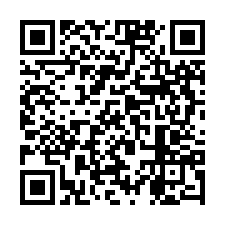

In [ ]:
import qrcode
from IPython.display import display, Image

def generate_qr_code(url):
    qr = qrcode.QRCode(

        box_size=5,
    )
    qr.add_data(url)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white")
    return img

if __name__ == "__main__":
    #url = input("Enter the URL: ")
    url = "https://c049c8b0-e309-44b9-995e-459d2a2eea3b.deepnoteproject.com"
    qr_image = generate_qr_code(url)
    display(qr_image)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c049c8b0-e309-44b9-995e-459d2a2eea3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>